# Zomato Data Analysis Using Python

In [31]:
# import require packages
import numpy as np # type: ignore
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import Zomato Data 
Zomato=pd.read_csv(r"https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/main/Zomato_Python_Project/Zomato%20data%20.csv")
# show frist five row in data frame
Zomato.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Data proccessing and cleaning

In [4]:

# count values in data
print("null values equal")
print(Zomato.isna().sum())
print("duplicated values equal",Zomato.duplicated().sum())
# no duplicated or null values in data

null values equal
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64
duplicated values equal 0


In [5]:
#remove / to can easly Analysis data
split=Zomato['rate'].str.split('/')
ZomatoRate=[]
for i,j in split:
    ZomatoRate.append(float(i))
Zomato['rate']=ZomatoRate

Text(0.5, 1.0, 'Top 15 Highest-Rated restaurants on Zomato')

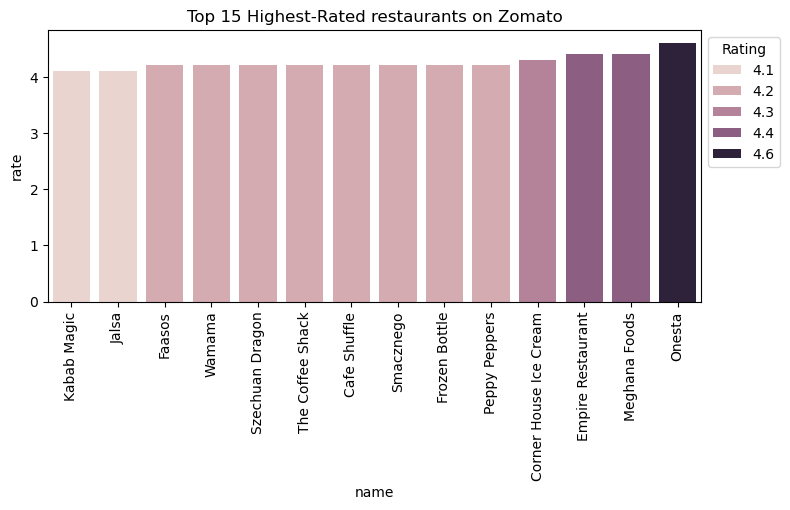

In [6]:
Datesortedbyrate=Zomato.sort_values('rate')
plt.figure(figsize=(8,5))
sns.barplot(data=Datesortedbyrate.tail(15),x='name',y='rate',hue='rate')
plt.xticks(rotation=90)
plt.legend(title='Rating', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title("Top 15 Highest-Rated restaurants on Zomato")

Text(0.5, 1.0, 'Top 15 lowest-Rated restaurants on Zomato')

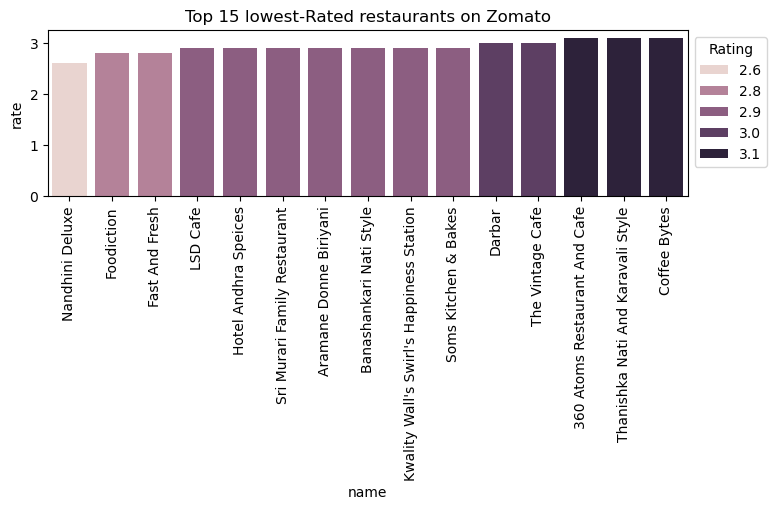

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=Datesortedbyrate.head(15),x='name',y='rate',hue='rate')
plt.xticks(rotation=90)

plt.legend(title='Rating', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title("Top 15 lowest-Rated restaurants on Zomato")

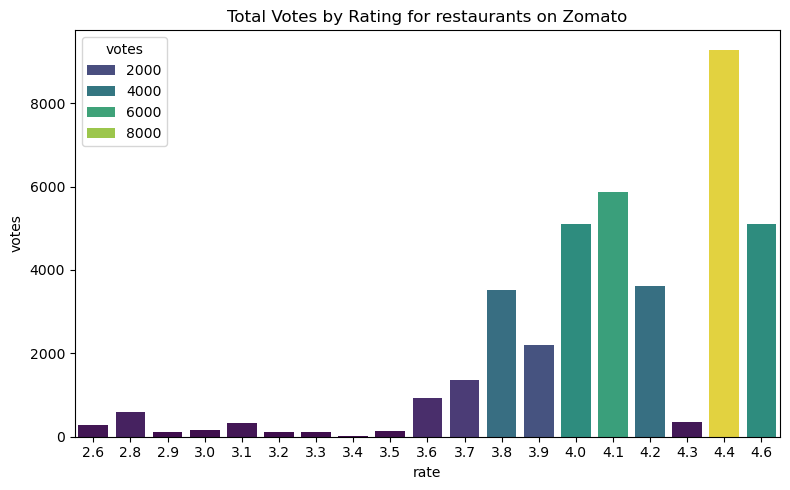

In [8]:
groupedbyrate=Zomato.groupby('rate')['votes'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=groupedbyrate,x='rate',y='votes',hue='votes', palette='viridis')
plt.title('Total Votes by Rating for restaurants on Zomato')
plt.tight_layout()
#conclasion number vote in low rate less number vote in high rate 

Text(0.5, 1.0, 'restaurants suppport online order on Zomato')

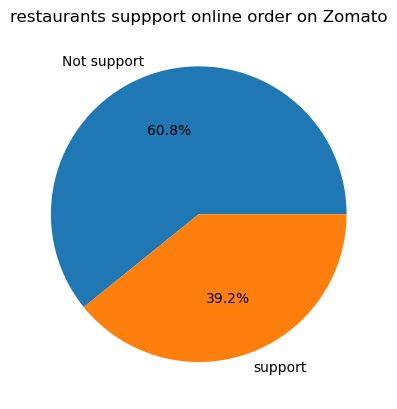

In [9]:
plt.pie(Zomato['online_order'].value_counts(),labels=['Not support','support'], autopct="%1.1f%%")
plt.title('restaurants suppport online order on Zomato')
#conclasion number of restaurants suppport online order  is more than number of restaurants not suppport online order 

Text(0.5, 1.0, 'restaurants suppport book_table on Zomato')

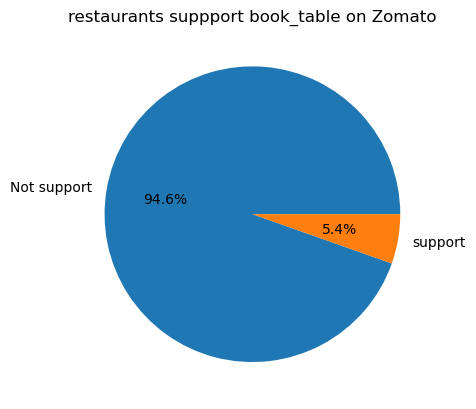

In [10]:
plt.pie(Zomato['book_table'].value_counts(),labels=['Not support','support'], autopct="%1.1f%%")
plt.title('restaurants suppport book_table on Zomato')
#conclasion most of restaurants doesnot suppport book_tabl

Text(0.5, 1.0, 'Distribution of restaurants Types on Zomato')

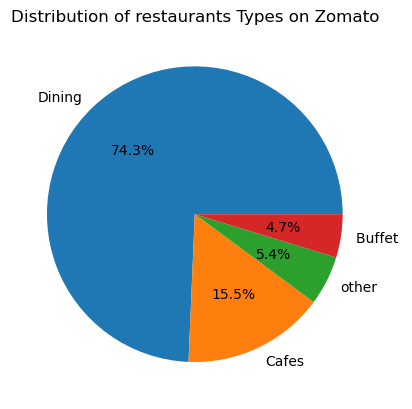

In [11]:
plt.pie(Zomato['listed_in(type)'].value_counts(),labels=['Dining','Cafes','other','Buffet '], autopct="%1.1f%%")
plt.title('Distribution of restaurants Types on Zomato')
#most restaurants in Zomato is Dining

C:\Users\ALEX STORE\AppData\Local\Temp\ipykernel_23196\3061231210.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=Zomato['approx_cost(for two people)'],palette='viridis')


Text(0.5, 0, 'cost')

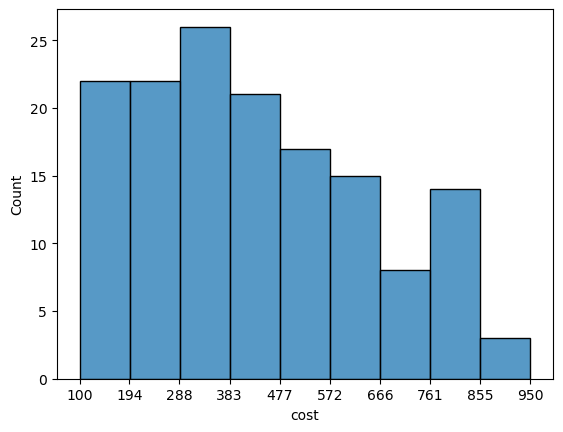

In [53]:
import math
data = Zomato['approx_cost(for two people)']
counts, bin_edges = np.histogram(data, bins='auto')
for i ,t in enumerate(bin_edges):
    bin_edges[i]=math.floor(t)
sns.histplot(x=Zomato['approx_cost(for two people)'],palette='viridis')
plt.xticks(bin_edges)
plt.xlabel('cost')
#The majority of couples prefer restaurants with an approximate cost from 288 to 383

([<matplotlib.axis.XTick at 0x21f33798650>,
 [Text(2.6, 0, '2.6'),
  Text(3.0, 0, '3.0'),
  Text(3.4, 0, '3.4'),
  Text(3.8, 0, '3.8'),
  Text(4.199999999999999, 0, '4.2'),
  Text(4.6, 0, '4.6')])

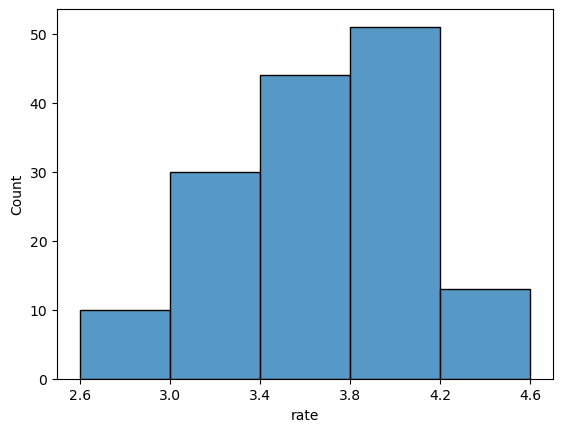

In [43]:
data = Zomato['rate']
counts, bin_edges = np.histogram(data, bins=5)
sns.histplot(x=Zomato['rate'],bins=5)
plt.xticks(bin_edges)
#most restaurants in Zomato rating from 3.8 to 4.2

Text(0, 0.5, 'Votes')

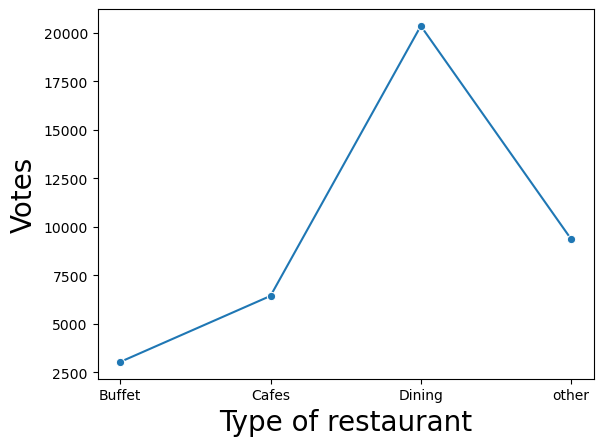

In [13]:
groupedbytype=Zomato.groupby('listed_in(type)')['votes'].sum().reset_index()
sns.lineplot(data=groupedbytype,x='listed_in(type)',y='votes',marker='o')
plt.xlabel("Type of restaurant", size=20)
plt.ylabel("Votes", size=20)
#dining has most votes means that perfered by peaple

Text(0, 0.5, 'rate')

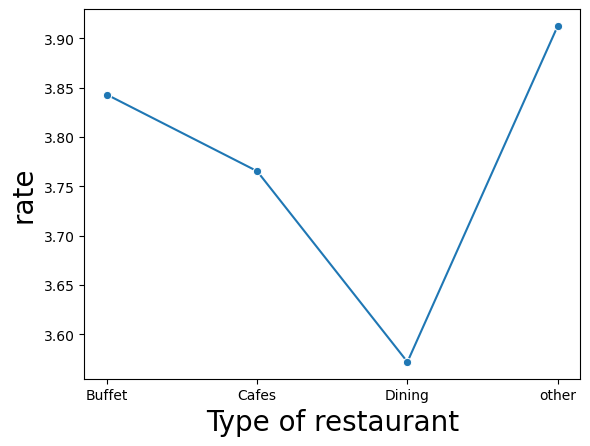

In [14]:
groupedbytype=Zomato.groupby('listed_in(type)')['rate'].mean().reset_index()
sns.lineplot(data=groupedbytype,x='listed_in(type)',y='rate',marker='o')
plt.xlabel("Type of restaurant", size=20)
plt.ylabel("rate", size=20)
#dining has lower rating avg means it have low qulity

<Axes: xlabel='online_order', ylabel='rate'>

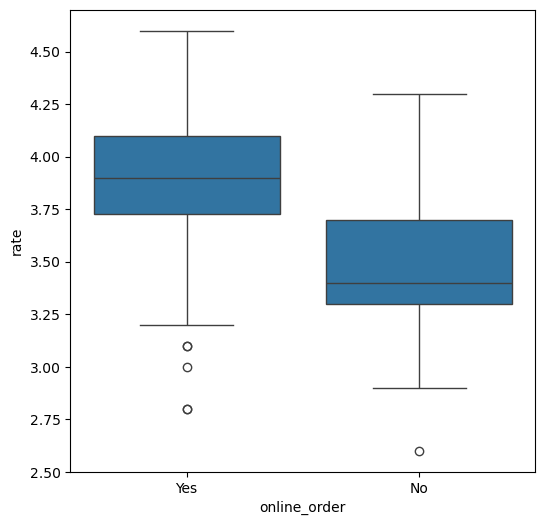

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'support online order ', y = 'rate', data = Zomato)
#rating of support online order is higer than not support online order

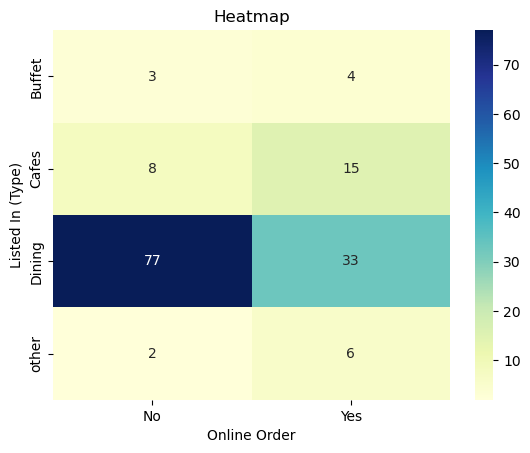

In [16]:
pivot_table = Zomato.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()